<a href="https://colab.research.google.com/github/Moutaz-Code/CancerModelColab/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [4]:
!pip install scipy
!pip install scikit-learn

from google.colab import drive

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from typing import final
import seaborn as sns
import pandas as pd
import numpy as np
import kagglehub
import os


# Read the Dataset and store it in DATA

In [5]:
path_to_directory = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")
file_path = os.path.join(path_to_directory, 'global_cancer_patients_2015_2024.csv')
originalDATA = pd.read_csv(file_path) # FINAL do NOT change


In [6]:
#Putting assignments alone so that we don't have to import the dataset every time we wanna assign stuff
testData_1 = testData_2 = testData_3 = originalDATA

# ***DATA Splitting***
---

In [7]:
testData_1 = testData_1.sample(n=10000, random_state=42).reset_index(drop=True)


# The .sample(n=5000, random_state=42) line randomly selects 5000 rows from the testData_1 DataFrame.
# Using a fixed random_state ensures reproducibility of the sampling.
# .reset_index(drop=True) resets the DataFrame index after sampling to have a clean 0-based index.

# Explore the Dataset

In [8]:
# No null values
testData_1.info()
print("\n==========================\t")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             10000 non-null  object 
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Country_Region         10000 non-null  object 
 4   Year                   10000 non-null  int64  
 5   Genetic_Risk           10000 non-null  float64
 6   Air_Pollution          10000 non-null  float64
 7   Alcohol_Use            10000 non-null  float64
 8   Smoking                10000 non-null  float64
 9   Obesity_Level          10000 non-null  float64
 10  Cancer_Type            10000 non-null  object 
 11  Cancer_Stage           10000 non-null  object 
 12  Treatment_Cost_USD     10000 non-null  float64
 13  Survival_Years         10000 non-null  float64
 14  Target_Severity_Score  10000 non-null  float64
dtypes: 

In [9]:
# mean vary significanlty between each attribute ==> Normalization is NEEDED!!!
# std not very high. Suggesting the distribution is good in each attribute
testData_1.describe()


,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,54.500600,2019.454700,4.983190,5.037670,4.991180,4.972860,4.978390,52613.848443,5.053290,4.941061
std,20.178149,2.857125,2.891457,2.909286,2.862019,2.879288,2.896823,27608.242504,2.884821,1.192061
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5006.490000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.600000,2.500000,2.500000,28306.930000,2.600000,4.120000
50%,55.000000,2019.000000,5.000000,5.100000,5.000000,5.000000,5.000000,53055.080000,5.100000,4.940000
75%,72.000000,2022.000000,7.500000,7.600000,7.500000,7.400000,7.500000,76767.602500,7.500000,5.770000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99978.250000,10.000000,8.810000


In [10]:
# DATA DataFrame does not contain any duplicate rows
print(testData_1.duplicated().sum())


0


# ***ENCODING***


---

*   **Gender** ==> label encoding (0, 1)
*   **Years** ==> Ordinal Encoding (not necessary as it is integer)
*   **Country_Region** ==> label encoding (0, 1, 2, .....)
*   **Cancer_type** ==> one-hot encoding
*   **Cancer_stage** ==> ordinal encoding



In [11]:
# Gender ==> label encoding (0, 1) (Female, Male)

le = LabelEncoder()
testData_1['Gender'] = le.fit_transform(testData_1['Gender'])


In [12]:
# Cancer_Type ==> one-hot encoding

ohe = OneHotEncoder(handle_unknown='ignore')
cancer_type_encoded = ohe.fit_transform(testData_1[['Cancer_Type']]).toarray()
cancer_type_df = pd.DataFrame(cancer_type_encoded, columns=ohe.get_feature_names_out(['Cancer_Type']))
testData_1 = pd.concat([testData_1.drop('Cancer_Type', axis=1), cancer_type_df], axis=1)



In [13]:
#Country_Region ==> label encoding (0, 1, 2, .....)

le = LabelEncoder()
testData_1['Country_Region'] = le.fit_transform(testData_1['Country_Region'])

In [14]:
# Cancer_Stage ==> ordinal encoding

ord = OrdinalEncoder()
testData_1['Cancer_Stage'] = ord.fit_transform(testData_1[['Cancer_Stage']])

In [15]:
testData_1

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,...,Survival_Years,Target_Severity_Score,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,PT0033553,63,1,0,2023,8.5,0.8,7.6,8.4,6.9,...,2.7,7.22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,PT0009427,64,2,5,2021,6.8,1.9,3.1,2.4,6.4,...,0.9,4.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PT0000199,79,0,4,2019,9.4,5.0,4.9,8.4,2.7,...,2.6,6.06,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,PT0012447,56,2,4,2019,5.9,7.5,6.5,0.5,7.5,...,3.3,4.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,PT0039489,41,1,4,2023,4.0,4.4,3.4,7.9,7.6,...,9.3,5.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PT0028567,36,2,6,2018,4.2,5.0,3.0,2.7,0.0,...,6.2,3.56,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,PT0025079,73,1,4,2019,6.6,2.3,7.8,2.7,2.3,...,4.0,4.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9997,PT0018707,23,2,2,2021,1.5,5.5,0.1,3.4,5.7,...,5.1,3.26,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,PT0015200,77,2,8,2016,5.7,4.6,2.0,1.7,4.5,...,0.9,3.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ***FEATURE SELECTION***
---


*   Drop Patient ID
*   Investigate what other attributes to be dropped using some techniques, e.g, information gain



##1) Pearson's Heatmaps

In [16]:
testData_1 = testData_1.drop('Patient_ID', axis=1)

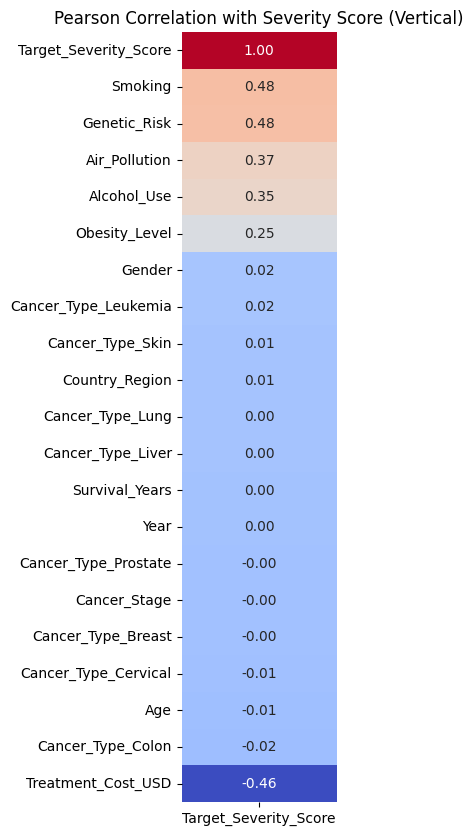

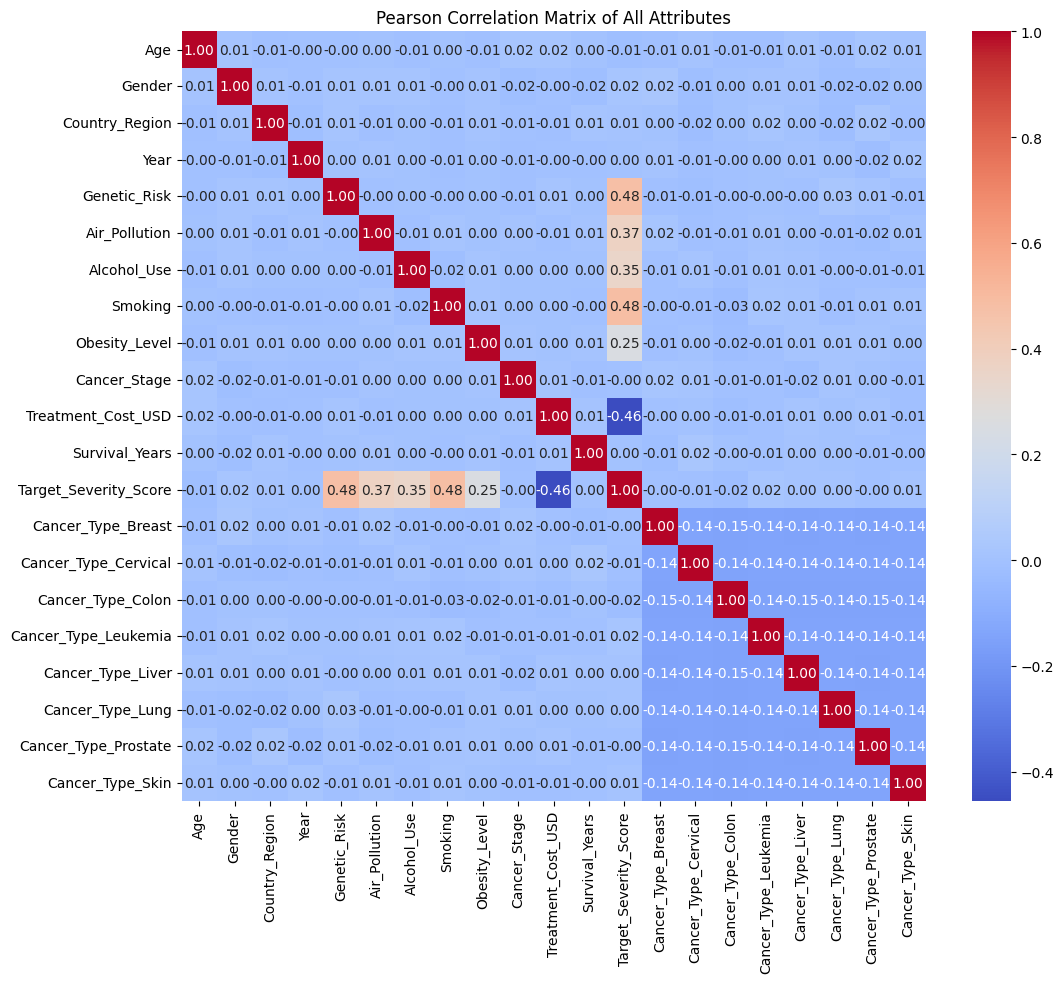

In [17]:
correlation_with_target = testData_1.corr()['Target_Severity_Score'].sort_values(ascending=False)
correlation_matrix = testData_1.corr()

# 1D Heatmap for correlation with target_severity_score, using pearson's
plt.figure(figsize=(2, 10))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Pearson Correlation with Severity Score (Vertical)')
plt.yticks(rotation=0)
plt.show()

print("\n")

# 2D Heatmap, using pearson's
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of All Attributes')
plt.show()


##2) Anova

In [18]:
X = testData_1.drop('Target_Severity_Score', axis=1)
y = testData_1['Target_Severity_Score']


k_best_anova = SelectKBest(score_func=f_regression, k='all')
k_best_anova.fit(X, y)

# Get scores and p-values
anova_scores = pd.DataFrame({'Feature': X.columns, 'ANOVA_Score': k_best_anova.scores_})

# Sort by score
anova_scores = anova_scores.sort_values(by='ANOVA_Score', ascending=False)

print("\nFeatures ranked by ANOVA F-value:")
print(anova_scores)



Features ranked by ANOVA F-value:
                 Feature  ANOVA_Score
7                Smoking  3050.485265
4           Genetic_Risk  2940.821877
10    Treatment_Cost_USD  2629.893852
5          Air_Pollution  1589.046323
6            Alcohol_Use  1407.357409
8          Obesity_Level   688.261572
14     Cancer_Type_Colon     3.435450
1                 Gender     3.004039
15  Cancer_Type_Leukemia     2.623136
0                    Age     1.814047
13  Cancer_Type_Cervical     0.846102
19      Cancer_Type_Skin     0.660038
2         Country_Region     0.369074
17      Cancer_Type_Lung     0.249448
16     Cancer_Type_Liver     0.231417
12    Cancer_Type_Breast     0.159681
11        Survival_Years     0.065981
9           Cancer_Stage     0.042358
18  Cancer_Type_Prostate     0.042354
3                   Year     0.040517


##3) Mutual Information

In [19]:

# --- Using Mutual Information ---
# Select features based on mutual information between each feature and the target
# Suitable for both numerical and categorical features, and can capture non-linear relationships.
# Note: mutual_info_classif is for discrete targets, mutual_info_regression is for continuous targets.
# Again, checking the target type to choose the appropriate function.

selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
selector_mi.fit(X, y)

# Get scores
mi_scores = pd.DataFrame({'Feature': X.columns, 'Mutual_Information_Score': selector_mi.scores_})

# Sort by score
mi_scores = mi_scores.sort_values(by='Mutual_Information_Score', ascending=False)

print("\nFeatures ranked by Mutual Information:")
print(mi_scores)

# You can use these rankings to select the top K features based on ANOVA or Mutual Information scores.
# For example, to get the top 5 features based on Mutual Information:
top_5_mi_features = mi_scores['Feature'].head(5).tolist()
print(f"\nTop 5 features based on Mutual Information: {top_5_mi_features}")


Features ranked by Mutual Information:
                 Feature  Mutual_Information_Score
4           Genetic_Risk                  0.132479
7                Smoking                  0.129161
10    Treatment_Cost_USD                  0.103430
5          Air_Pollution                  0.083810
6            Alcohol_Use                  0.072362
8          Obesity_Level                  0.035330
1                 Gender                  0.006410
19      Cancer_Type_Skin                  0.006201
15  Cancer_Type_Leukemia                  0.006015
3                   Year                  0.004635
9           Cancer_Stage                  0.003149
17      Cancer_Type_Lung                  0.002241
11        Survival_Years                  0.001151
0                    Age                  0.000000
2         Country_Region                  0.000000
12    Cancer_Type_Breast                  0.000000
14     Cancer_Type_Colon                  0.000000
13  Cancer_Type_Cervical                  

# ***DROP IRRELEVANT***
---

In [20]:
# Prepare X and y
X = testData_1.drop('Target_Severity_Score', axis=1)
y = testData_1['Target_Severity_Score']

# Perform Mutual Information feature selection
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X, y)

# Get scores
mi_scores = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': selector.scores_
})

# Filter features with Mutual Information score >= 0.01
selected_features_mi = mi_scores[mi_scores['MI_Score'] > 0.01]['Feature'].tolist()

# Create new DataFrame with selected features + target
mi_filtered_data = testData_1[selected_features_mi + ['Target_Severity_Score']]

# Display the selected features
print("Selected features with Mutual Information score >= 0.01:")
print(selected_features_mi)

# Identify and print dropped features
dropped_features_mi = set(X.columns) - set(selected_features_mi)
print("Dropped features:")
print(dropped_features_mi)

Selected features with Mutual Information score >= 0.01:
['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Cancer_Type_Lung']
Dropped features:
{'Cancer_Type_Prostate', 'Gender', 'Age', 'Cancer_Type_Skin', 'Cancer_Type_Cervical', 'Survival_Years', 'Year', 'Cancer_Type_Colon', 'Cancer_Type_Liver', 'Cancer_Stage', 'Cancer_Type_Breast', 'Country_Region', 'Cancer_Type_Leukemia'}


In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),

}
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Linear Regression": {
        # No hyperparameters worth tuning in basic LinearRegression
    }
}

In [22]:
# evaluation function
def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append({
            "Model": name,
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
            "R2": r2_score(y_test, y_pred)
        })
    return pd.DataFrame(results)

In [23]:
# Add cross-validation
def evaluate_models_cv(X, y, models, n_splits=4):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_results = {}
    for name, model in models.items():
        print(f"Performing {n_splits}-fold cross-validation for {name}...")
        scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)

        cv_results[name] = {
            "Mean MAE": -scores.mean(),
        }

        scores_mse = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
        cv_results[name]["Mean MSE"] = -scores_mse.mean()

        scores_rmse = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1)
        cv_results[name]["Mean RMSE"] = -scores_rmse.mean()

        scores_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2', n_jobs=-1)
        cv_results[name]["Mean R2"] = scores_r2.mean()

    results_df = pd.DataFrame.from_dict(cv_results, orient='index')
    return results_df

#Testing & Tuning Models

In [24]:
# Evaluate on testData_1
print("Evaluating models on testData_1:")
X_modified = testData_1.drop('Target_Severity_Score', axis=1)
y_modified = testData_1['Target_Severity_Score']
modified_results = evaluate_models(X_modified, y_modified, models)
print(modified_results)

print("\n" + "="*50 + "\n")

# Evaluate on feature_selected_data
print("Evaluating models on feature_selected_data:")
X_selected = mi_filtered_data.drop('Target_Severity_Score', axis=1)
y_selected = mi_filtered_data['Target_Severity_Score']
selected_results = evaluate_models(X_selected, y_selected, models)
print(selected_results)

Evaluating models on testData_1:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002492  0.000008  0.002886  0.999994
1      Decision Tree  0.393630  0.245412  0.495391  0.821157
2      Random Forest  0.198109  0.061322  0.247632  0.955312
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


Evaluating models on feature_selected_data:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002489  0.000008  0.002883  0.999994
1      Decision Tree  0.364930  0.209895  0.458143  0.847040
2      Random Forest  0.175913  0.048741  0.220774  0.964480
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


In [25]:
#filtering outliers
Q1 = mi_filtered_data['Target_Severity_Score'].quantile(0.25)
Q3 = mi_filtered_data['Target_Severity_Score'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers in the target column
no_outliers = mi_filtered_data[
    (mi_filtered_data['Target_Severity_Score'] >= lower_bound) &
    (mi_filtered_data['Target_Severity_Score'] <= upper_bound)
]

# Step 4: Optionally, check how many rows were removed
print(f"Original rows: {len(mi_filtered_data)}")
print(f"Rows after outlier removal: {len(no_outliers)}")

Original rows: 10000
Rows after outlier removal: 9970


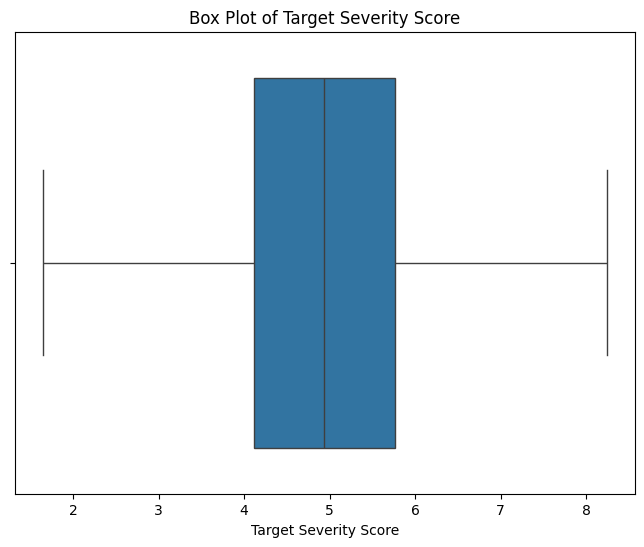

In [26]:
# Do the box plot for the target attribute
plt.figure(figsize=(8, 6))
sns.boxplot(x=no_outliers['Target_Severity_Score'])
plt.title('Box Plot of Target Severity Score')
plt.xlabel('Target Severity Score')
plt.show()

In [27]:
# Evaluate on no_outliers
print("Evaluating models on no_outliers:")
X_no_outliers = mi_filtered_data.drop('Target_Severity_Score', axis=1)
y_no_outliers = mi_filtered_data['Target_Severity_Score']
selected_results = evaluate_models(X_selected, y_selected, models)
print(selected_results)

Evaluating models on no_outliers:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002489  0.000008  0.002883  0.999994
1      Decision Tree  0.364930  0.209895  0.458143  0.847040
2      Random Forest  0.175913  0.048741  0.220774  0.964480
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


In [28]:
scaler = StandardScaler()
standard_scaled_data = pd.DataFrame(scaler.fit_transform(no_outliers), columns=no_outliers.columns)

# Display the scaled data
#standard_scaled_data.head()

In [29]:
# Evaluate on scaledDATA
print("Evaluating models on scaled data:")
X_scaledDATA = standard_scaled_data.drop('Target_Severity_Score', axis=1)
y_scaledDATA = standard_scaled_data['Target_Severity_Score']
selected_results = evaluate_models(X_selected, y_selected, models)
print(selected_results)

Evaluating models on scaled data:
               Model       MAE       MSE      RMSE        R2
0  Linear Regression  0.002489  0.000008  0.002883  0.999994
1      Decision Tree  0.364930  0.209895  0.458143  0.847040
2      Random Forest  0.175913  0.048741  0.220774  0.964480
3  Gradient Boosting  0.112321  0.019834  0.140832  0.985546


In [30]:
# --- Now evaluate using cross-validation ---

print("\n" + "="*50 + "\n")

# Evaluate on scaledDATA (after scaling)
print("Evaluating models on scaled data using cross-validation:")
X_scaledDATA_cv = standard_scaled_data.drop('Target_Severity_Score', axis=1)
y_scaledDATA_cv = standard_scaled_data['Target_Severity_Score']
scaledDATA_cv_results = evaluate_models_cv(X_scaledDATA_cv, y_scaledDATA_cv, models)
scaledDATA_cv_results



Evaluating models on scaled data using cross-validation:
Performing 4-fold cross-validation for Linear Regression...
Performing 4-fold cross-validation for Decision Tree...
Performing 4-fold cross-validation for Random Forest...
Performing 4-fold cross-validation for Gradient Boosting...


,Mean MAE,Mean MSE,Mean RMSE,Mean R2
Linear Regression,0.002121,0.000006,0.002452,0.999994
Decision Tree,0.304691,0.146684,0.382973,0.853283
Random Forest,0.150602,0.035811,0.189232,0.964173
Gradient Boosting,0.095798,0.014506,0.120413,0.985483


##Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

def fine_tune_models(X, y, models, param_grids, cv=5, scoring='neg_mean_absolute_error'):
    best_models = {}
    for name, model in models.items():
        print(f"\nTuning {name}...")
        if name not in param_grids or len(param_grids[name]) == 0:
            print(f"Skipping {name} (no params to tune)")
            best_models[name] = model
            continue
        grid = GridSearchCV(model, param_grid=param_grids[name],
                            scoring=scoring, cv=cv, n_jobs=-1)
        grid.fit(X, y)
        print(f"Best params for {name}: {grid.best_params_}")
        print(f"Best score: {-grid.best_score_:.4f}")  # Convert MAE to positive
        best_models[name] = grid.best_estimator_
    return best_models


In [32]:
X_final = standard_scaled_data.drop('Target_Severity_Score', axis=1)
y_final = standard_scaled_data['Target_Severity_Score']

best_models = fine_tune_models(X_final, y_final, models, param_grids)



Tuning Linear Regression...
Skipping Linear Regression (no params to tune)

Tuning Decision Tree...
Best params for Decision Tree: {'max_depth': 20, 'min_samples_split': 5}
Best score: 0.2930

Tuning Random Forest...
Best params for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.1464

Tuning Gradient Boosting...
Best params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score: 0.0808


In [33]:
tuned_cv_results = evaluate_models_cv(X_final, y_final, best_models)
tuned_cv_results

Performing 4-fold cross-validation for Linear Regression...
Performing 4-fold cross-validation for Decision Tree...
Performing 4-fold cross-validation for Random Forest...
Performing 4-fold cross-validation for Gradient Boosting...


,Mean MAE,Mean MSE,Mean RMSE,Mean R2
Linear Regression,0.002121,0.000006,0.002452,0.999994
Decision Tree,0.302952,0.145113,0.380918,0.854860
Random Forest,0.150602,0.035811,0.189232,0.964173
Gradient Boosting,0.080835,0.010287,0.101411,0.989707


## Check Outliers of each Attribute

Number of outliers per numerical column (Z-score method, threshold=3):
0

Number of rows with at least one outlier (Z-score method): 0

Number of outliers per numerical column (IQR method):
Genetic_Risk                0
Air_Pollution               0
Alcohol_Use                 0
Smoking                     0
Obesity_Level               0
Treatment_Cost_USD          0
Cancer_Type_Lung         1229
Target_Severity_Score       0
dtype: int64

Number of rows with at least one outlier (IQR method): 1229

Generating box plots for numerical columns to visualize outliers...


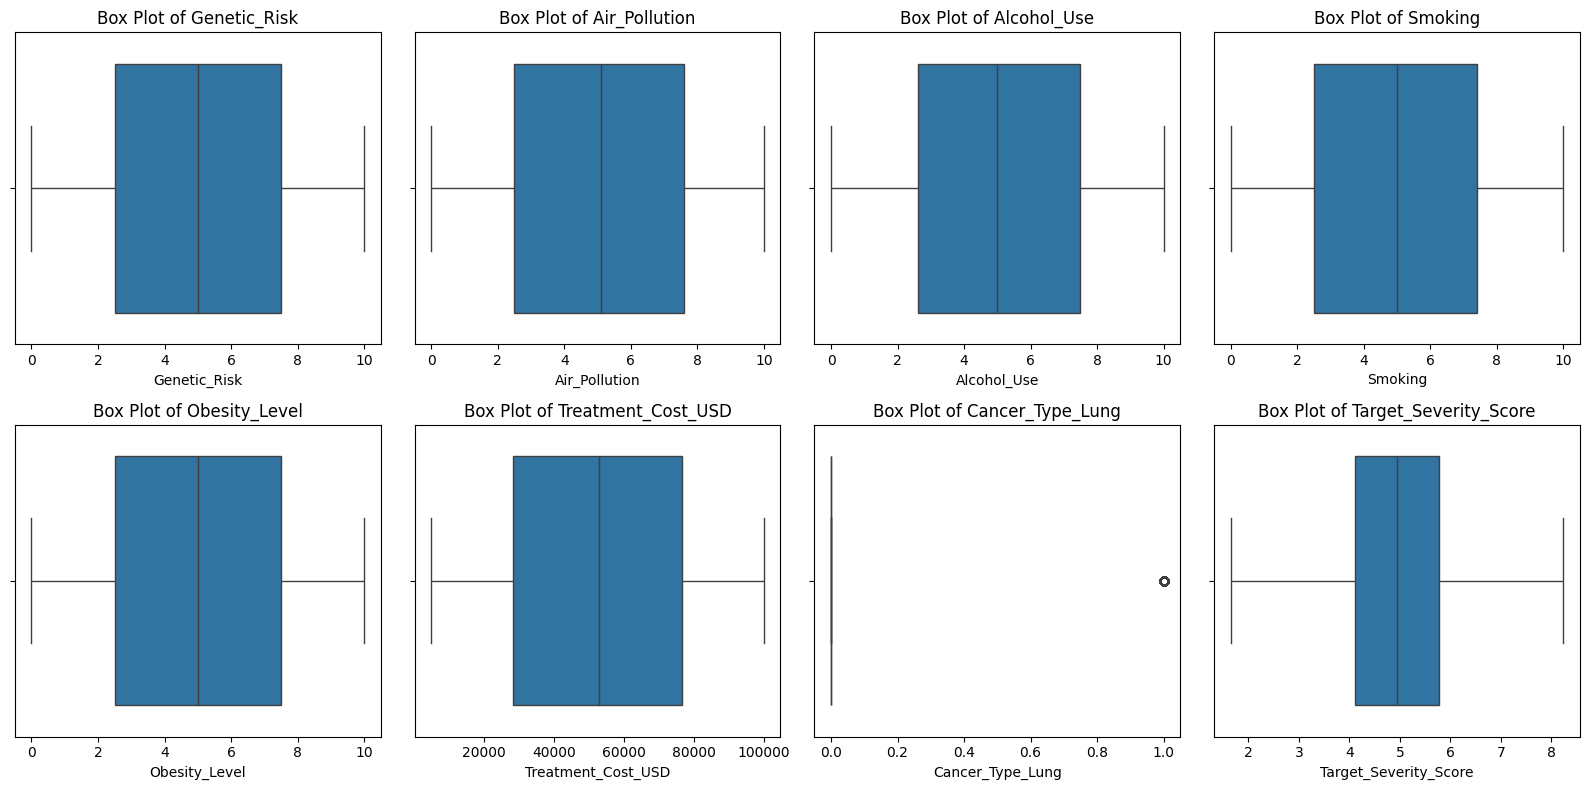

In [34]:

from scipy.stats import zscore

# --- Check Outliers using Z-score ---
# Z-score measures how many standard deviations away from the mean a data point is.
# A common threshold for identifying outliers is a Z-score of 3 or -3.
# This method is sensitive to the mean and standard deviation, making it suitable for normally distributed data.

# Calculate Z-scores for all numerical columns in the DataFrame `no_outliers`
z_scores = zscore(no_outliers.select_dtypes(include=np.number)) # Calculate z-scores only for numerical columns

# Create a boolean DataFrame indicating if a value is an outlier (Z-score > 3 or < -3)
outliers_zscore = (np.abs(z_scores) > 3)

# Count the number of outliers per column
outliers_count_zscore = outliers_zscore.sum()

print("Number of outliers per numerical column (Z-score method, threshold=3):")
print(outliers_count_zscore)

# Optionally, you can get the rows that contain at least one outlier based on Z-score
rows_with_outliers_zscore = no_outliers[outliers_zscore.any(axis=1)]
print(f"\nNumber of rows with at least one outlier (Z-score method): {len(rows_with_outliers_zscore)}")

# You can also view these rows
# print("\nRows identified as having outliers (Z-score method):")
# print(rows_with_outliers_zscore)

# --- Check Outliers using IQR ---
# IQR (Interquartile Range) is less sensitive to extreme values than the Z-score.
# Outliers are often defined as values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

# Calculate Q1, Q3, and IQR for each numerical column
Q1 = no_outliers.select_dtypes(include=np.number).quantile(0.25)
Q3 = no_outliers.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

# Create a boolean DataFrame indicating if a value is an outlier based on the IQR method
outliers_iqr = ((no_outliers.select_dtypes(include=np.number) < lower_bound_iqr) | (no_outliers.select_dtypes(include=np.number) > upper_bound_iqr))

# Count the number of outliers per column
outliers_count_iqr = outliers_iqr.sum()

print("\nNumber of outliers per numerical column (IQR method):")
print(outliers_count_iqr)

# Optionally, you can get the rows that contain at least one outlier based on IQR
rows_with_outliers_iqr = no_outliers[outliers_iqr.any(axis=1)]
print(f"\nNumber of rows with at least one outlier (IQR method): {len(rows_with_outliers_iqr)}")

# You can also view these rows
# print("\nRows identified as having outliers (IQR method):")
# print(rows_with_outliers_iqr)

# Visualizing outliers using Box Plots for selected numerical columns
print("\nGenerating box plots for numerical columns to visualize outliers...")
numerical_cols = no_outliers.select_dtypes(include=np.number).columns
num_plots = len(numerical_cols)
if num_plots > 0:
    n_cols = 4 # Adjust the number of columns for subplots as needed
    n_rows = (num_plots + n_cols - 1) // n_cols # Calculate number of rows
    plt.figure(figsize=(n_cols * 4, n_rows * 4))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(x=no_outliers[col])
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found to plot box plots.")

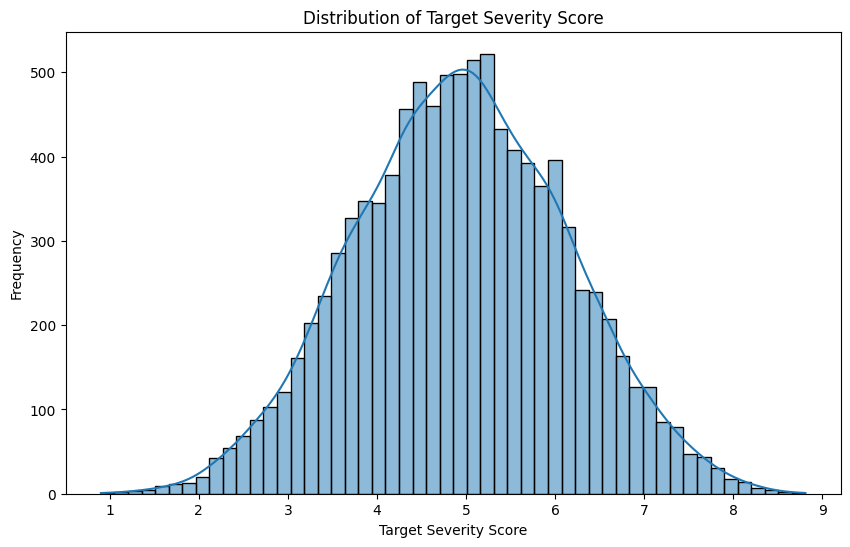

In [35]:
#The values are symmetrically distributed.
#There’s no heavy skew, and
#There are no dominant peaks that would drown out other value ranges.
plt.figure(figsize=(10, 6))
sns.histplot(testData_1['Target_Severity_Score'], kde=True)
plt.title('Distribution of Target Severity Score')
plt.xlabel('Target Severity Score')
plt.ylabel('Frequency')
plt.show()

DATA['Target_Severity_Score'].describe()


## Correlation Analysis

#Visualization

Generating histograms before scaling...


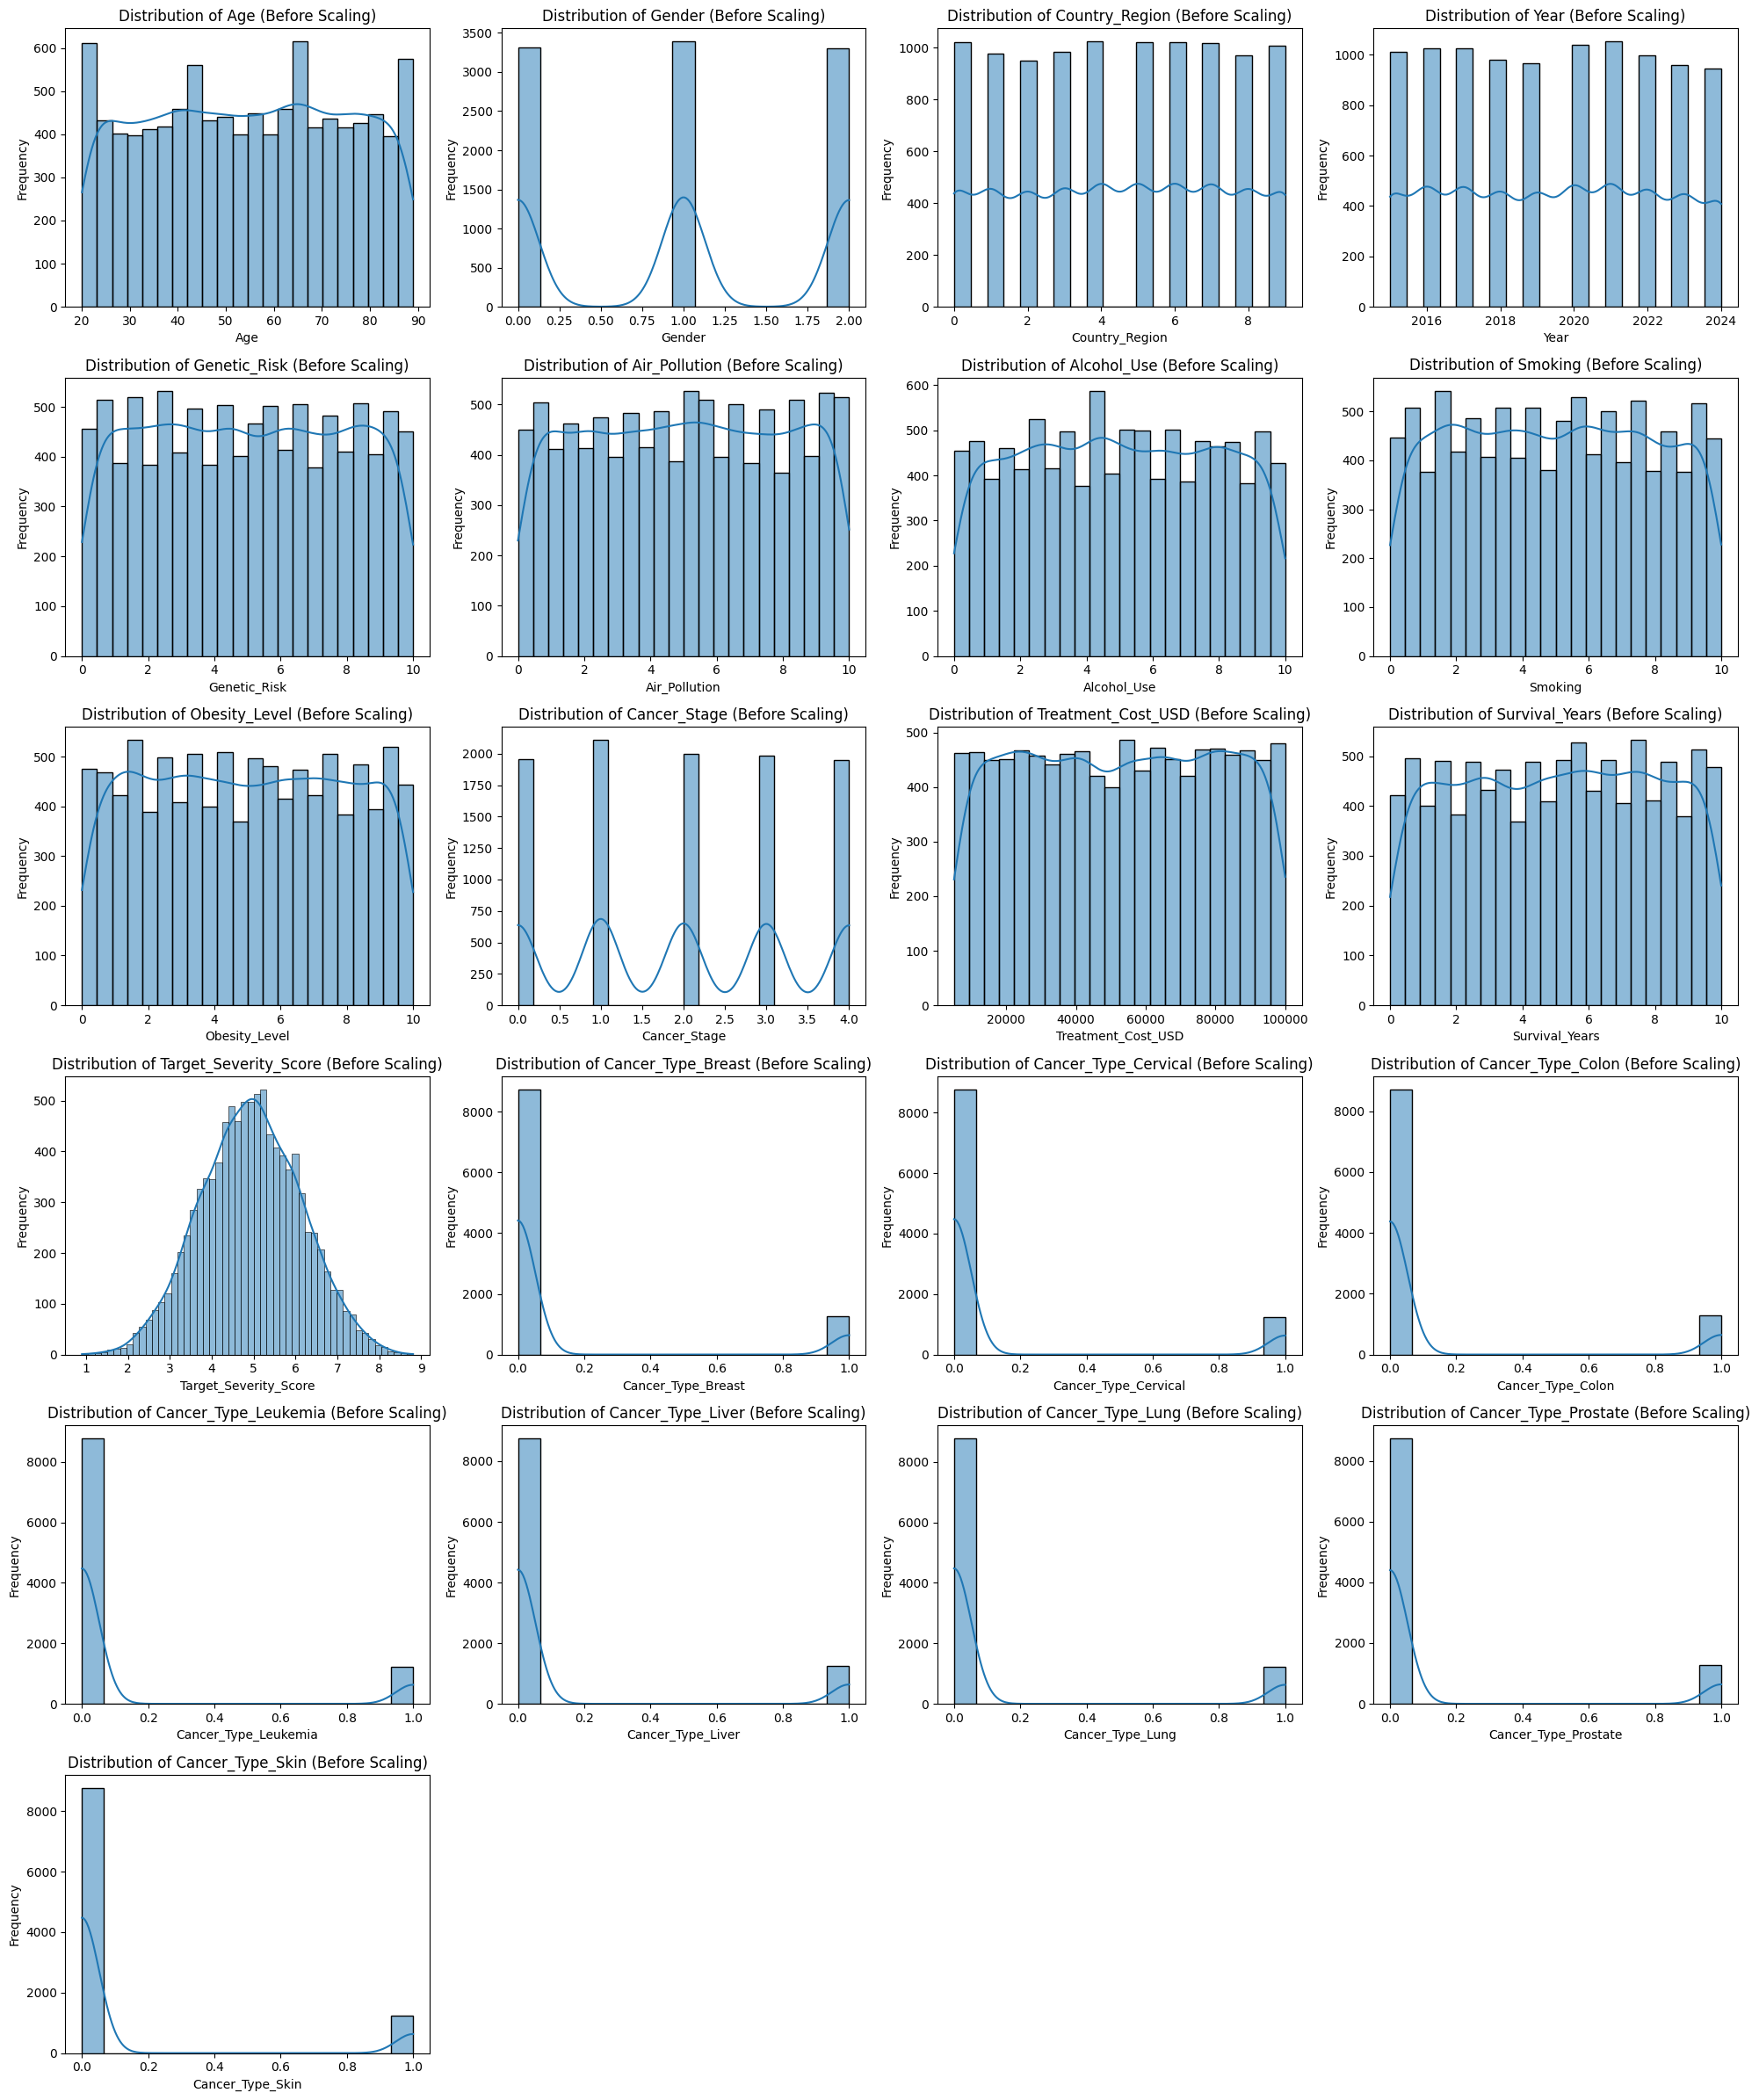

Generating histograms after scaling...


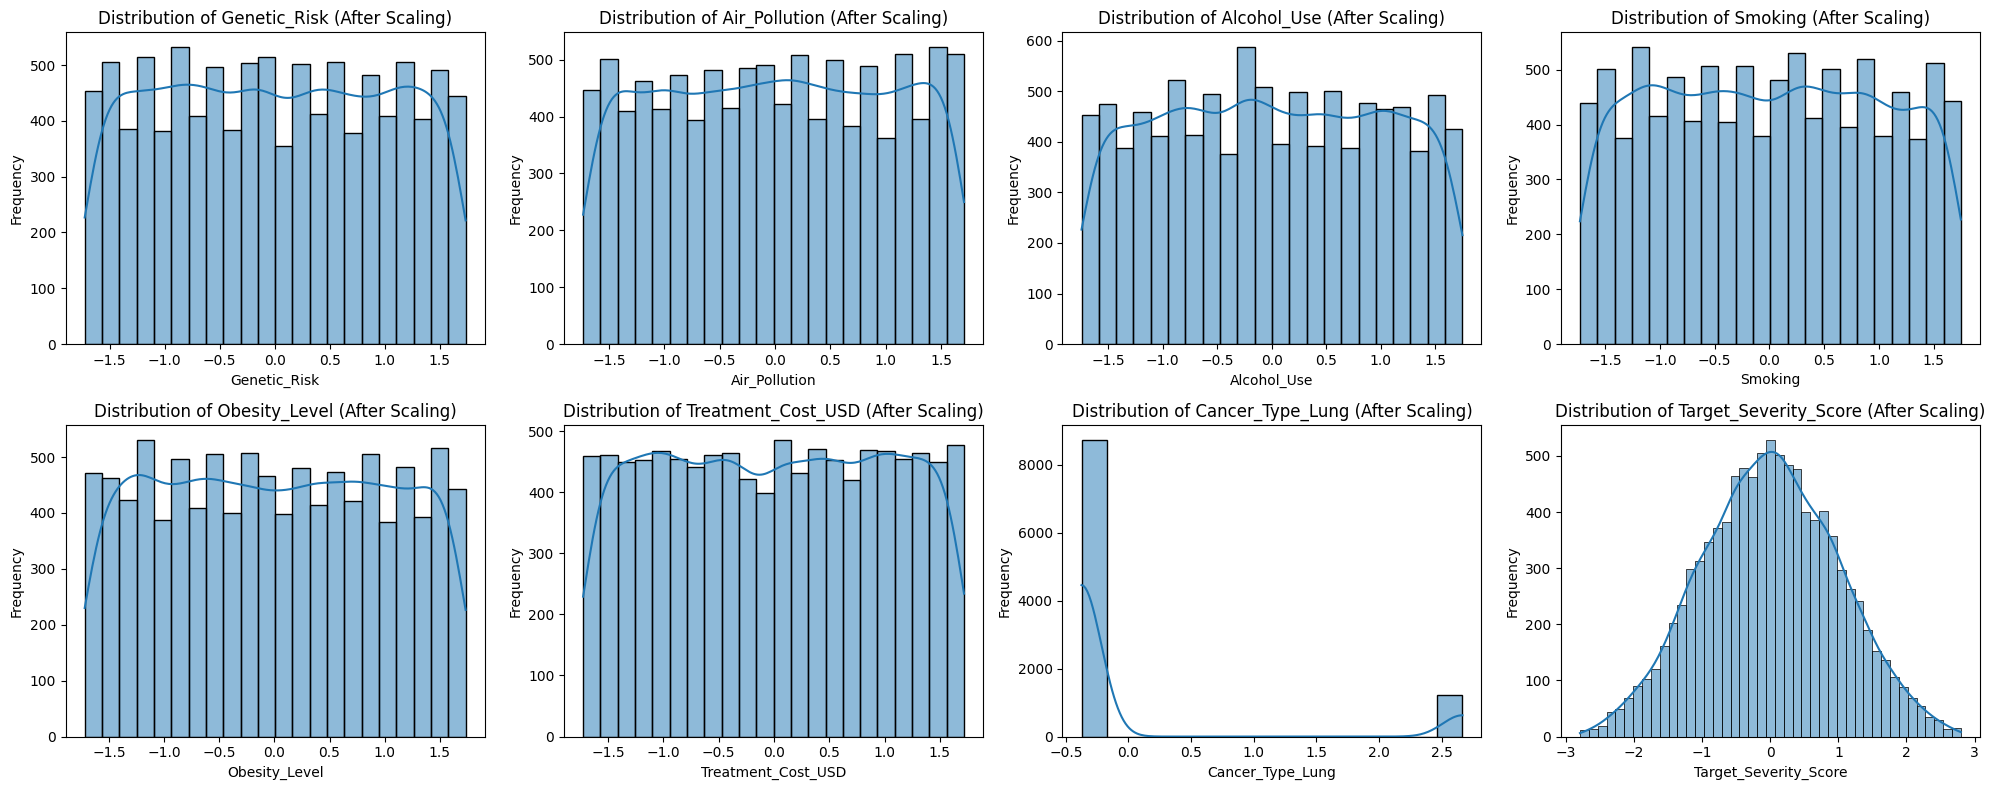

Generating correlation heatmap after processing and feature selection...


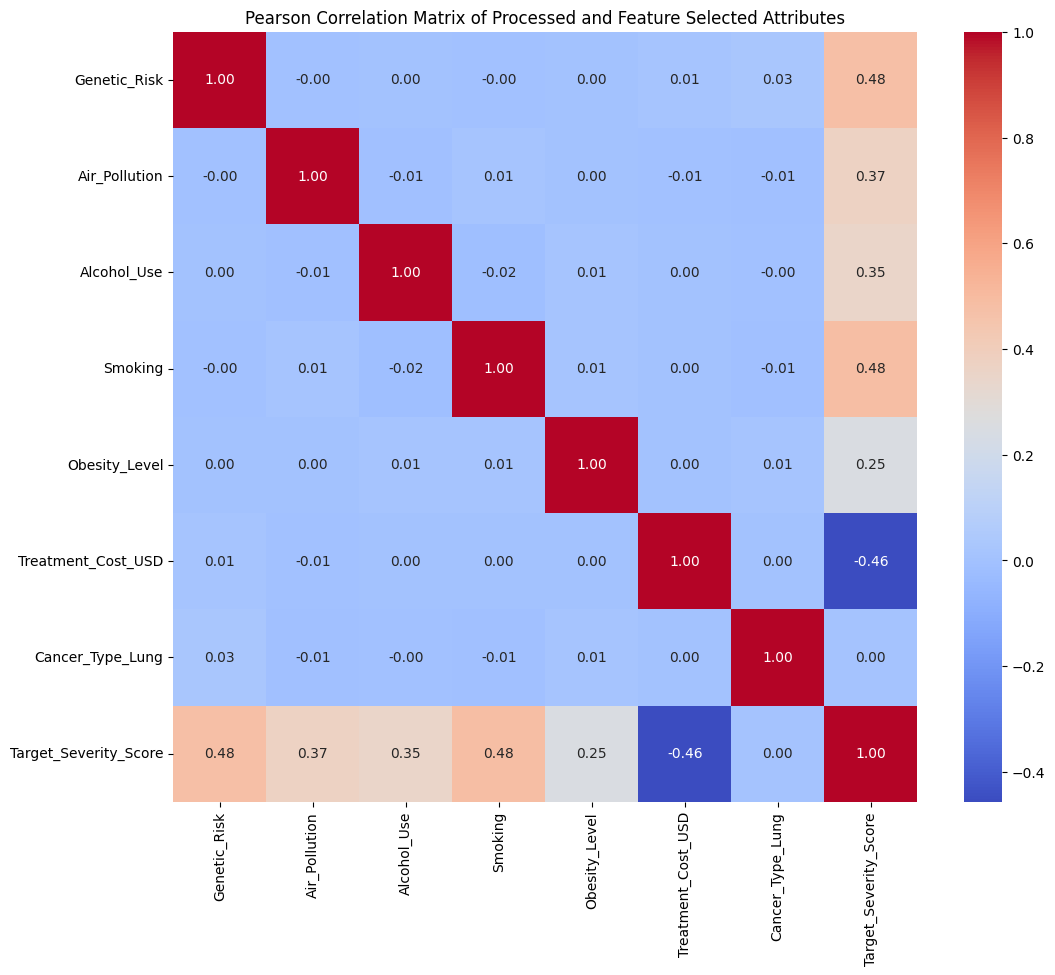

Generating bar plots for cross-validation results...


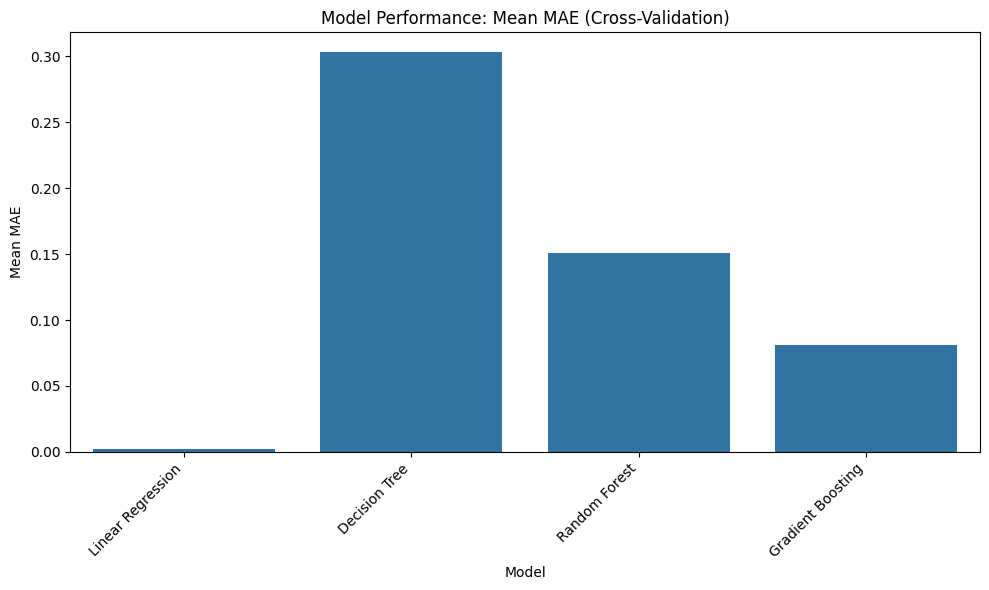

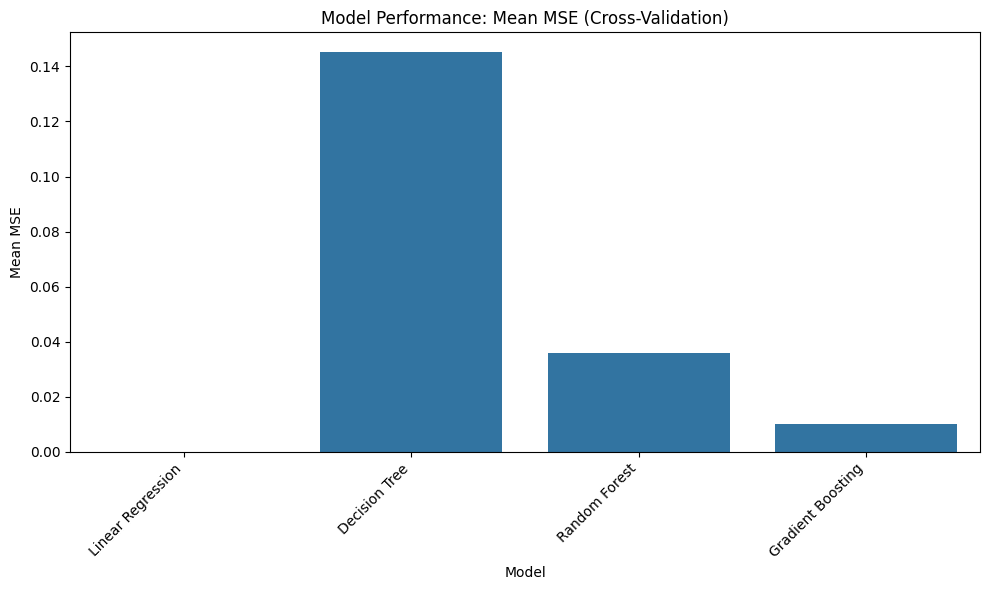

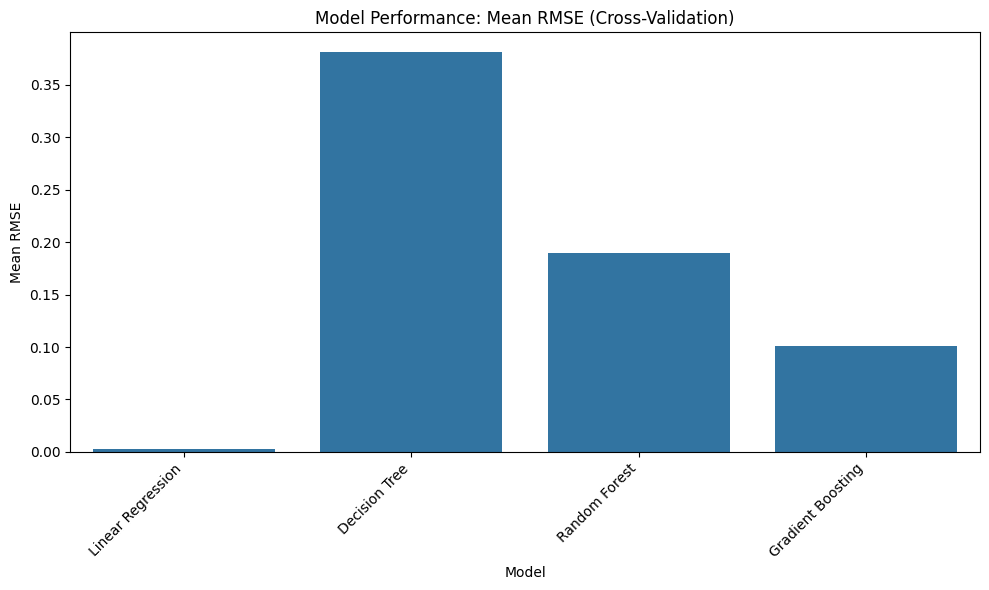

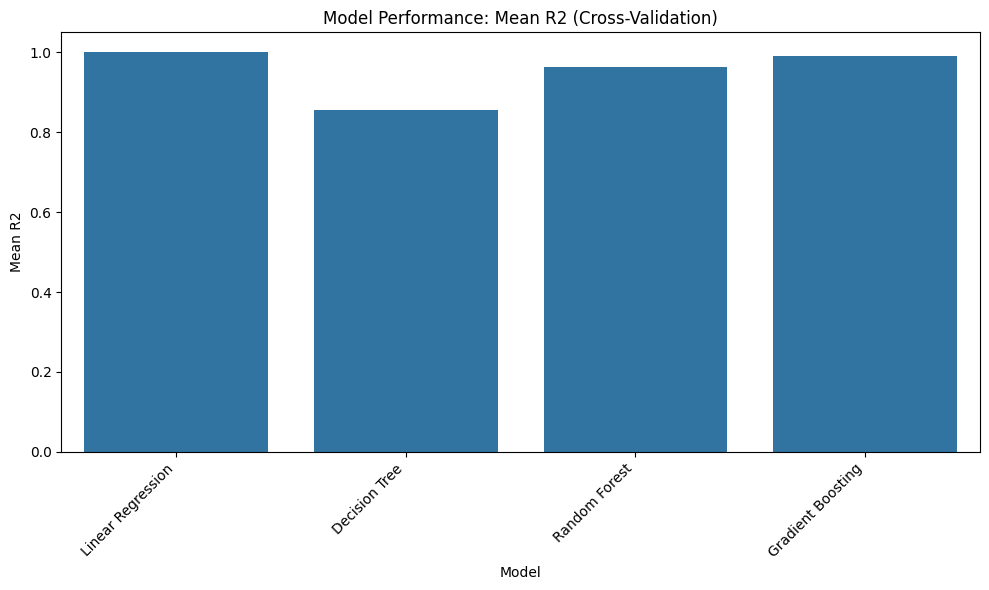

Generating scatter plot of Actual vs. Predicted for Linear Regression...


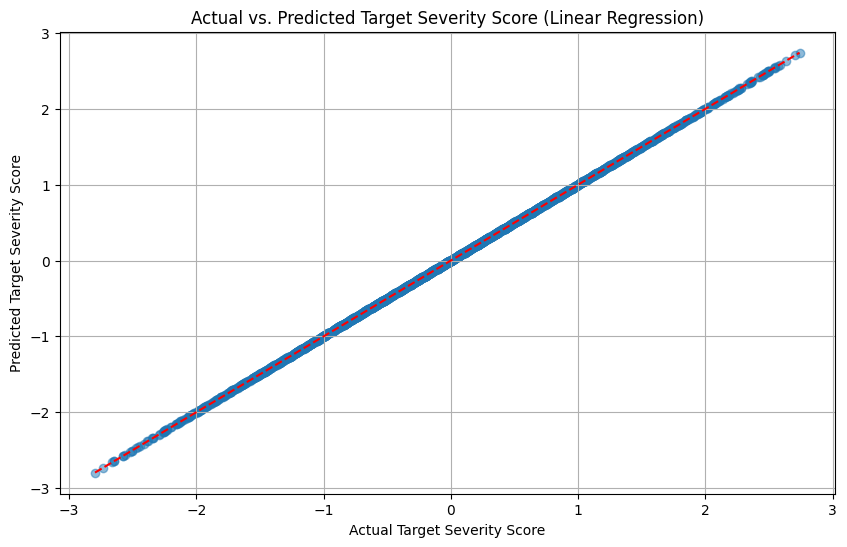

Generating bar plots for model evaluation results (Before Tuning)...


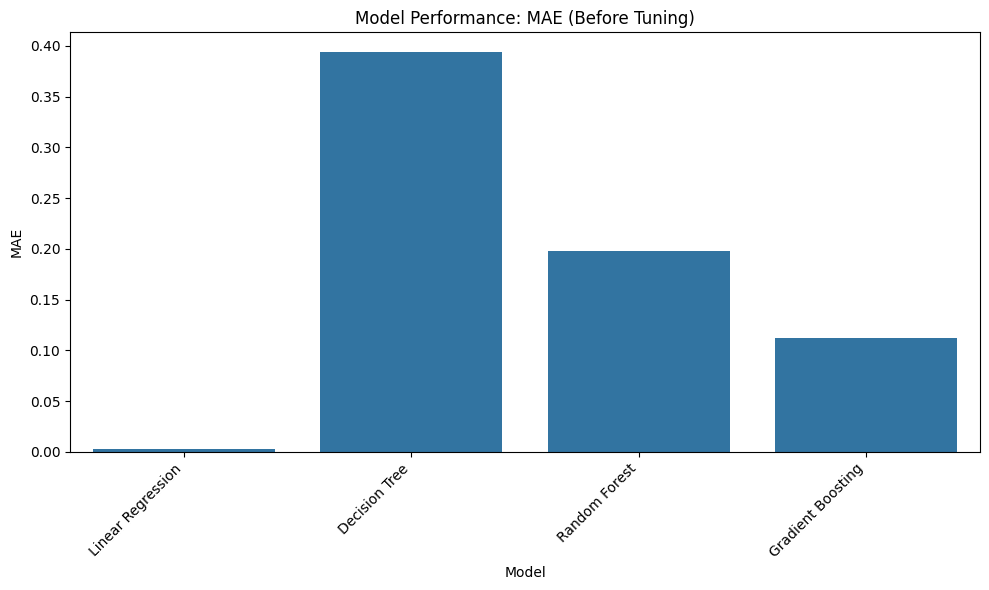

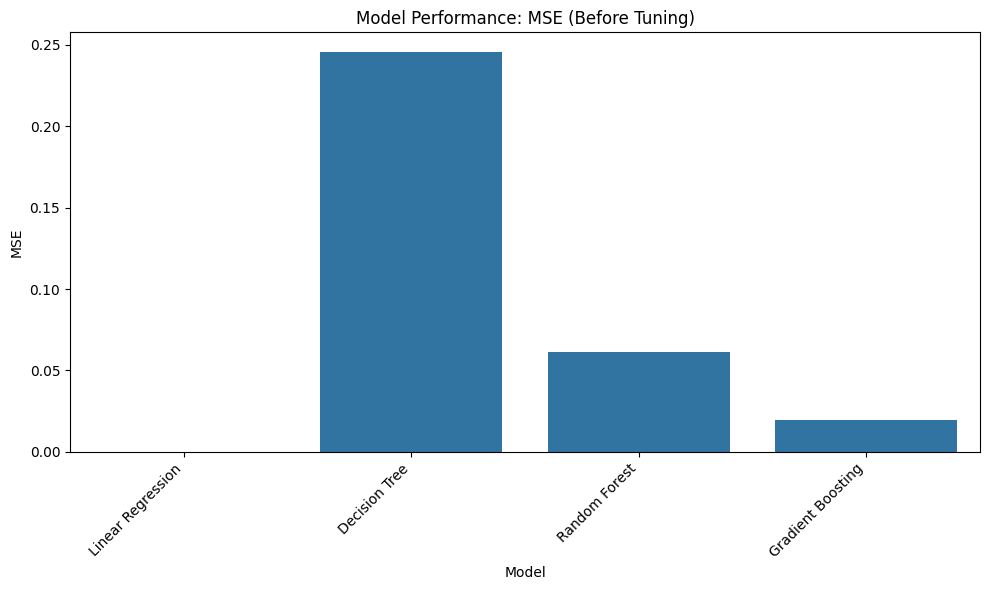

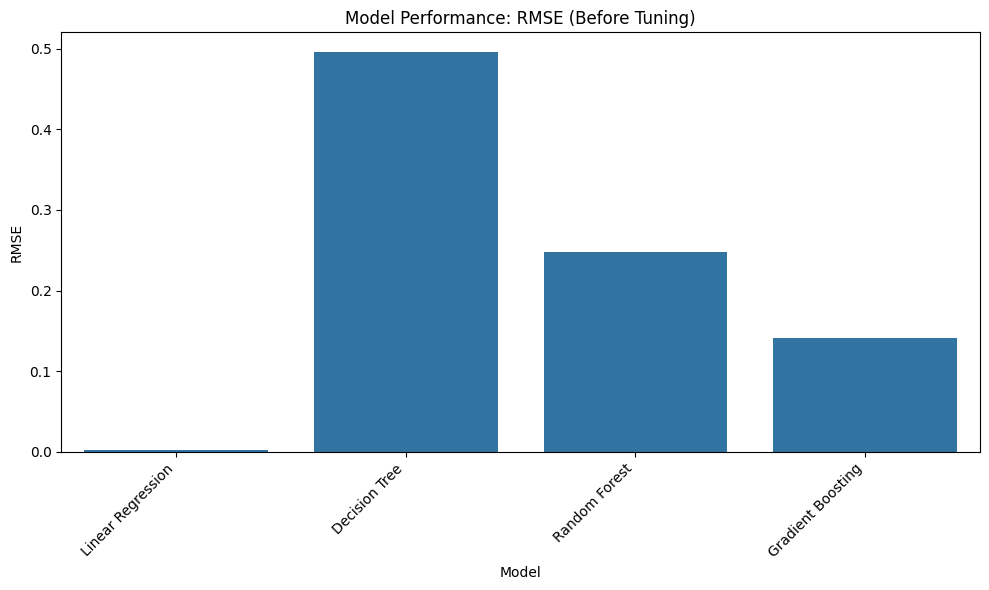

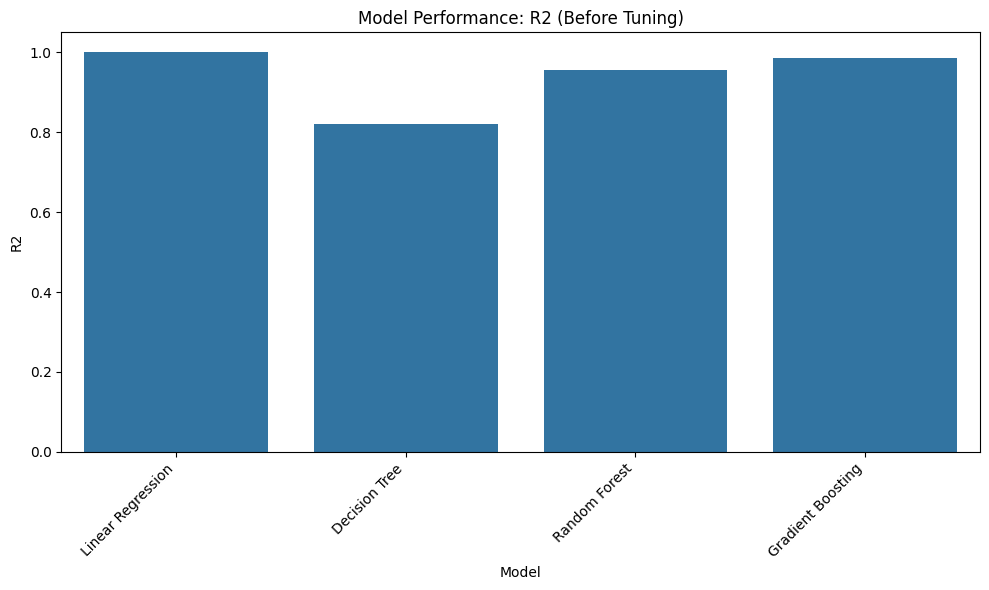

Generating bar plots for model evaluation results (After Tuning with Cross-Validation)...


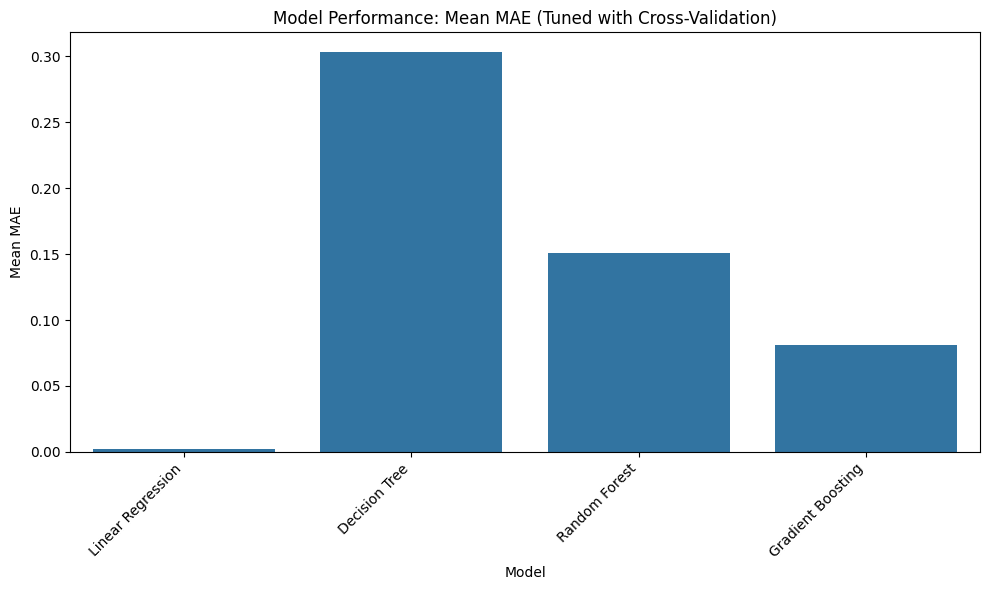

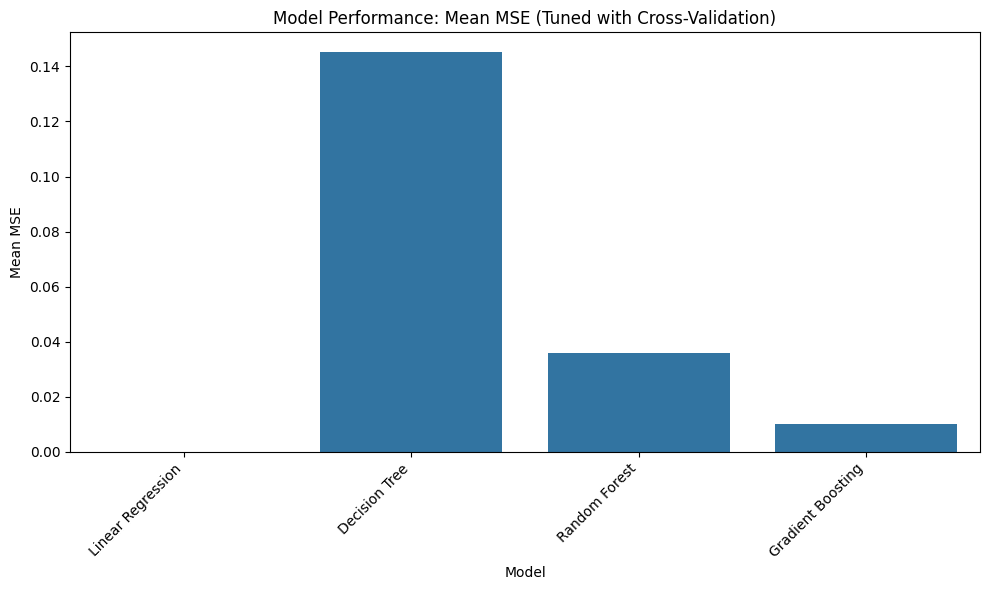

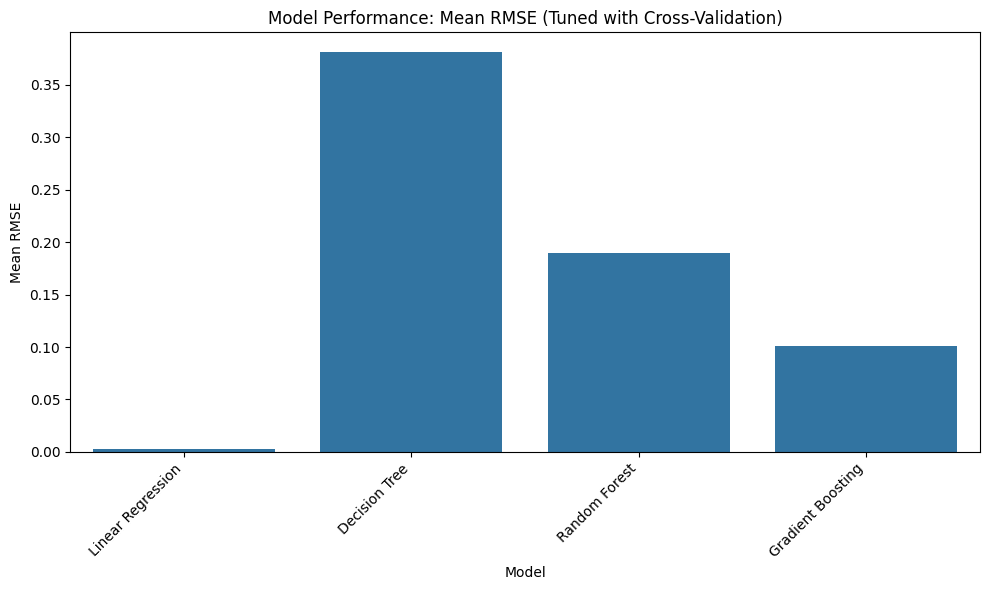

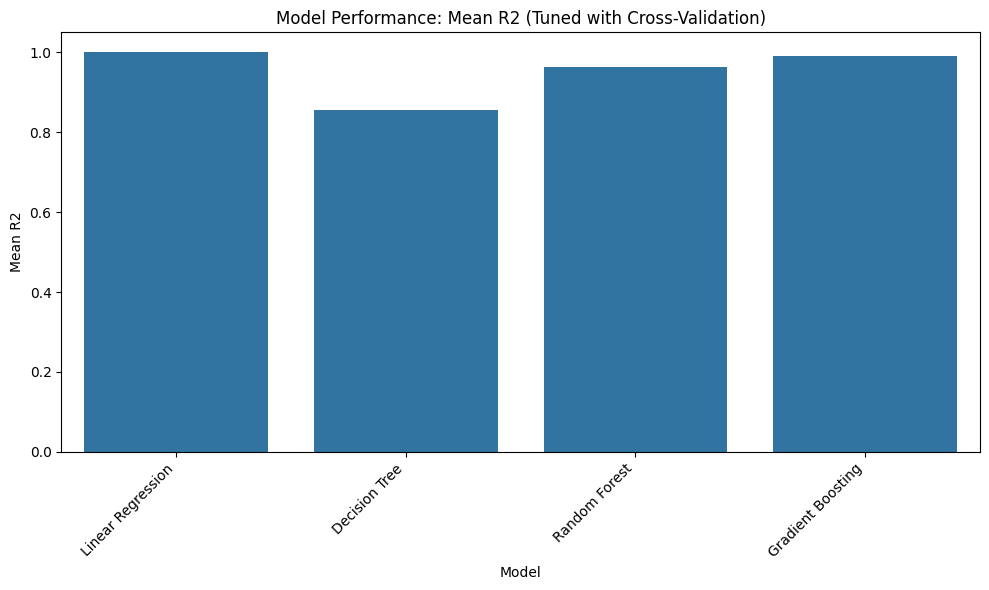


Detailed Model Performance Statistics:

Performance on the Initial Test Set (Before Tuning):


,Model,MAE,MSE,RMSE,R2
0,Linear Regression,0.002492,0.000008,0.002886,0.999994
1,Decision Tree,0.393630,0.245412,0.495391,0.821157
2,Random Forest,0.198109,0.061322,0.247632,0.955312
3,Gradient Boosting,0.112321,0.019834,0.140832,0.985546



Performance with Cross-Validation (After Tuning):


,Mean MAE,Mean MSE,Mean RMSE,Mean R2
Linear Regression,0.002121,0.000006,0.002452,0.999994
Decision Tree,0.302952,0.145113,0.380918,0.854860
Random Forest,0.150602,0.035811,0.189232,0.964173
Gradient Boosting,0.080835,0.010287,0.101411,0.989707



Generating scatter plots of Actual vs. Predicted for Tuned Models...
Generating scatter plot for Gradient Boosting...


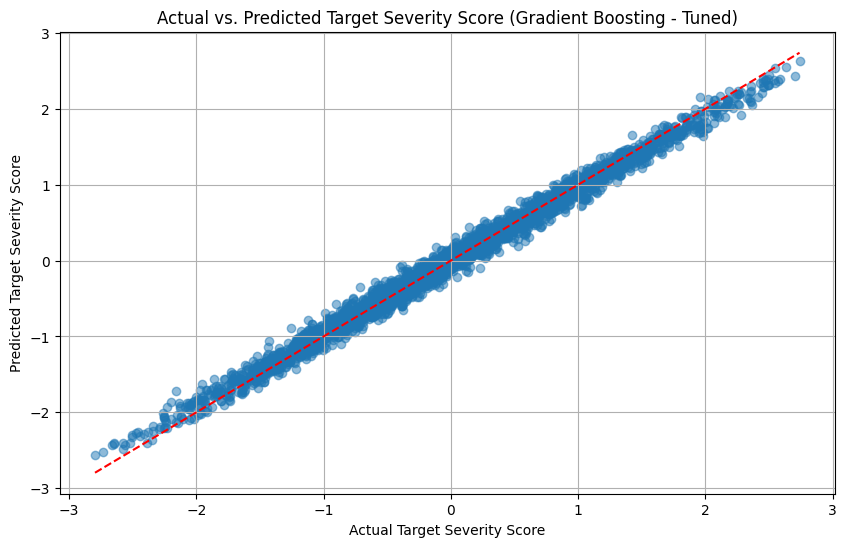

Generating scatter plot for Random Forest...


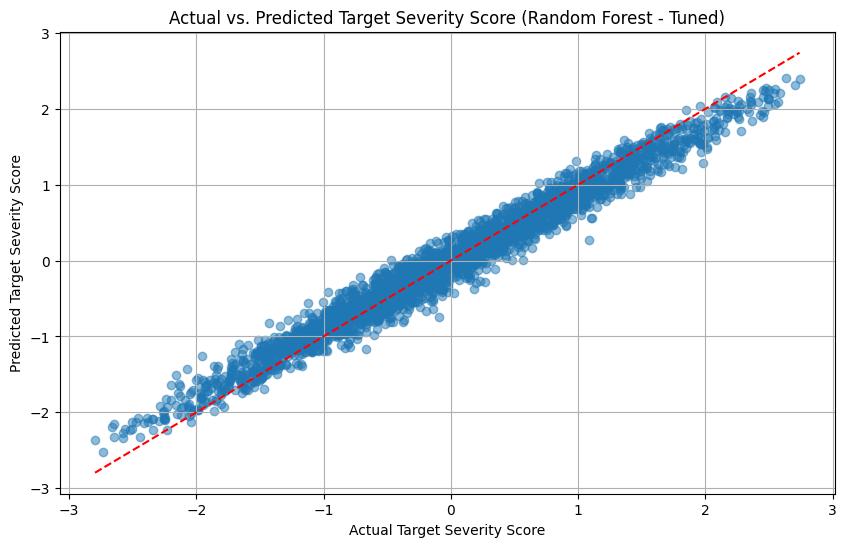

Generating scatter plot for Decision Tree...


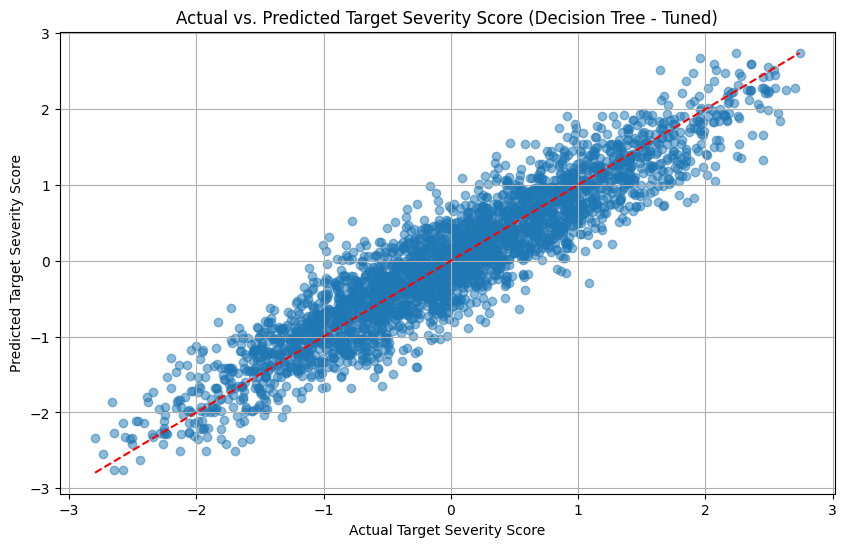

In [38]:
# 1. Data Distribution (Histograms with KDE) - Before Scaling
print("Generating histograms before scaling...")
numerical_cols_before_scaling = testData_1.select_dtypes(include=np.number).columns
n_cols = 4
n_rows = (len(numerical_cols_before_scaling) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_cols_before_scaling):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(testData_1[col], kde=True)
    plt.title(f'Distribution of {col} (Before Scaling)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Data Distribution (Histograms with KDE) - After Scaling
print("Generating histograms after scaling...")
numerical_cols_after_scaling = standard_scaled_data.select_dtypes(include=np.number).columns
n_cols = 4
n_rows = (len(numerical_cols_after_scaling) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(numerical_cols_after_scaling):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(standard_scaled_data[col], kde=True)
    plt.title(f'Distribution of {col} (After Scaling)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 3. Correlation Heatmap (after processing and feature selection)
print("Generating correlation heatmap after processing and feature selection...")
correlation_matrix_processed = mi_filtered_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_processed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix of Processed and Feature Selected Attributes')
plt.show()


# 4. Model Performance (Bar Plots for Evaluation Metrics - Cross-Validation)
print("Generating bar plots for cross-validation results...")
cv_metrics = ['Mean MAE', 'Mean MSE', 'Mean RMSE', 'Mean R2']
for metric in cv_metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=tuned_cv_results.index, y=tuned_cv_results[metric])
    plt.title(f'Model Performance: {metric} (Cross-Validation)')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 5. Scatter Plot of Actual vs. Predicted Values (for the best performing model, e.g., Gradient Boosting)

best_model_name = 'Linear Regression' # Change if a different model performed best
if best_model_name in best_models:
    print(f"Generating scatter plot of Actual vs. Predicted for {best_model_name}...")
    model_to_plot = best_models[best_model_name]
    # Need to re-split data for the scatter plot to show predictions on test set
    X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)
    model_to_plot.fit(X_train, y_train)
    y_pred = model_to_plot.predict(X_test)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Ideal prediction line
    plt.xlabel("Actual Target Severity Score")
    plt.ylabel("Predicted Target Severity Score")
    plt.title(f"Actual vs. Predicted Target Severity Score ({best_model_name})")
    plt.grid(True)
    plt.show()
else:
    print(f"Could not generate scatter plot for {best_model_name} as it was not found in the best_models dictionary.")

# 6. Model Performance (Bar Plots for Evaluation Metrics - Before Tuning)
print("Generating bar plots for model evaluation results (Before Tuning)...")
initial_metrics = ['MAE', 'MSE', 'RMSE', 'R2']
for metric in initial_metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=modified_results['Model'], y=modified_results[metric])
    plt.title(f'Model Performance: {metric} (Before Tuning)')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 7. Model Performance (Bar Plots for Evaluation Metrics - After Tuning with Cross-Validation)
print("Generating bar plots for model evaluation results (After Tuning with Cross-Validation)...")
tuned_cv_metrics = ['Mean MAE', 'Mean MSE', 'Mean RMSE', 'Mean R2']
for metric in tuned_cv_metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=tuned_cv_results.index, y=tuned_cv_results[metric])
    plt.title(f'Model Performance: {metric} (Tuned with Cross-Validation)')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 8. Detailed Model Performance Statistics (Tables)
print("\nDetailed Model Performance Statistics:")

print("\nPerformance on the Initial Test Set (Before Tuning):")
display(modified_results)

print("\nPerformance with Cross-Validation (After Tuning):")
display(tuned_cv_results)

# 9. Scatter Plots of Actual vs. Predicted Values for Multiple Tuned Models
print("\nGenerating scatter plots of Actual vs. Predicted for Tuned Models...")

# Select a few models to plot (you can adjust this list)
models_to_plot = ['Gradient Boosting', 'Random Forest', 'Decision Tree']

# Need to re-split data for the scatter plot to show predictions on test set
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

for model_name in models_to_plot:
    if model_name in best_models:
        print(f"Generating scatter plot for {model_name}...")
        model_to_plot = best_models[model_name]
        model_to_plot.fit(X_train, y_train)
        y_pred = model_to_plot.predict(X_test)

        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Ideal prediction line
        plt.xlabel("Actual Target Severity Score")
        plt.ylabel("Predicted Target Severity Score")
        plt.title(f"Actual vs. Predicted Target Severity Score ({model_name} - Tuned)")
        plt.grid(True)
        plt.show()
    else:
        print(f"Could not generate scatter plot for {model_name} as it was not found in the best_models dictionary.")
